In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np

In [85]:
def remove_zeros_distribution(X):

    return [i for i in X if i != 0]

def log_binning_distribution(x_i,B = 20): 
    
    x_i = remove_zeros_distribution(x_i)

    b_1 = min(x_i)
    b_Bp1 = max(x_i)
    q_1 = np.log(b_1)
    q_Bp1 = np.log(b_Bp1)
    D_q = q_Bp1 - q_1
    L_q = D_q / B

    q_list = []
    b_list = []

    for i in range(B):
        j = i + 1
        q_list.append(q_1 + (j-1)*L_q)
        b_list.append(np.exp(q_1 + (j-1)*L_q))

    # b_list.insert(0,b_1)
    # b_list.append(b_Bp1)
    
    binned_x_i = []
    density_list = []

    for i in range(len(b_list)-1):
        bin_low = b_list[i]
        bin_high = b_list[i+1]
        count_bin = 0
        for j in range(len(x_i)):
            if x_i[j] >= bin_low and x_i[j] < bin_high:
                count_bin = count_bin + 1
                
        if count_bin > 0:
            density_bin = count_bin / (len(x_i)*(bin_high-bin_low))
            density_list.append(density_bin)
            binned_x_i.append(bin_low)
        else:
            continue 
            
    return binned_x_i, density_list

# Network-Derived Negatives

In [2]:
network_derived = pd.read_csv('/data/sars-busters-consolidated/GitData/interactions/Network_Derived_Negatives.csv')

In [3]:
ligands = set(network_derived['InChiKey'].tolist())
targets = set(network_derived['target_aa_code'].tolist())

print('Distinct ligands: ', len(ligands))
print('Distinct targets: ', len(targets))

Distinct ligands:  6810
Distinct targets:  4472


In [4]:
network_derived['Y'].to_list().count(1)

19665

In [5]:
ligand_pos_deg = dict()
ligand_neg_deg = dict()
ligand_degree_ratios = dict()

for lig in tqdm(ligands):
    sub_df = network_derived[network_derived['InChiKey'] == lig]
    ligand_pos_deg[lig] = sub_df['Y'].to_list().count(1)
    ligand_neg_deg[lig] = sub_df['Y'].to_list().count(0)
    ligand_degree_ratios[lig] = sub_df['Y'].to_list().count(1) / (sub_df['Y'].to_list().count(1) + sub_df['Y'].to_list().count(0))

100%|██████████| 6810/6810 [00:46<00:00, 145.51it/s]


In [90]:
stats.spearmanr(list(deeppurpose_ligand_pos_deg.values()), list(deeppurpose_ligand_degree_ratios.values()))

SpearmanrResult(correlation=0.9499079932794898, pvalue=0.0)

In [91]:
stats.spearmanr(list(ligand_pos_deg.values()), list(ligand_degree_ratios.values()))

SpearmanrResult(correlation=0.8147772000704914, pvalue=0.0)

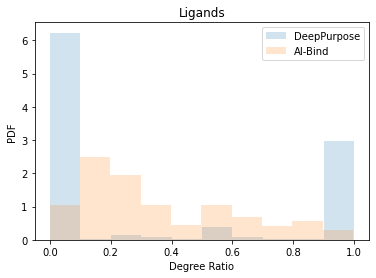

In [100]:
plt.hist(deeppurpose_ligand_degree_ratios.values(),alpha=0.2,density=True,cumulative=False,label='DeepPurpose') ## Fit a beta distribution

plt.hist(ligand_degree_ratios.values(),alpha=0.2,density=True,cumulative=False,label='AI-Bind')

plt.legend()
plt.title('Ligands')
plt.xlabel('Degree Ratio')
plt.ylabel('PDF')
plt.show()

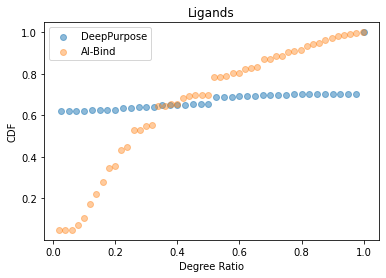

In [92]:
#plt.hist([x/max(list(ligand_pos_deg.values())) for x in list(ligand_pos_deg.values())],alpha=0.2,bins=40,density='True',label='Positive Degree')
#plt.hist([x/max(list(ligand_neg_deg.values())) for x in list(ligand_neg_deg.values())],alpha=0.2,bins=20,density='True',label='Negative Degree')

#plt.hist(deeppurpose_ligand_degree_ratios.values(),alpha=0.2,density=True,cumulative=True,label='DeepPurpose') ## Fit a beta distribution
count, bins_count = np.histogram(list(deeppurpose_ligand_degree_ratios.values()),bins=40)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.scatter(bins_count[1:],cdf, label="DeepPurpose",alpha=0.5)

#plt.hist(ligand_degree_ratios.values(),alpha=0.2,density=True,cumulative=True,label='AI-Bind','o')
count, bins_count = np.histogram(list(ligand_degree_ratios.values()),bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.scatter(bins_count[1:], cdf,label="AI-Bind",alpha=0.4)
#plt.scatter(list(ligand_pos_deg.values()),ligand_degree_ratios.values(),alpha=0.1)

plt.legend()
plt.title('Ligands')
plt.xlabel('Degree Ratio')
plt.ylabel('CDF')
plt.show()

In [93]:
stats.spearmanr(list(deeppurpose_target_pos_deg.values()), list(deeppurpose_target_degree_ratios.values()))

SpearmanrResult(correlation=0.7382139973221894, pvalue=1.3398299686933646e-259)

In [94]:
stats.spearmanr(list(target_pos_deg.values()), list(target_degree_ratios.values()))

SpearmanrResult(correlation=0.8903895958189773, pvalue=0.0)

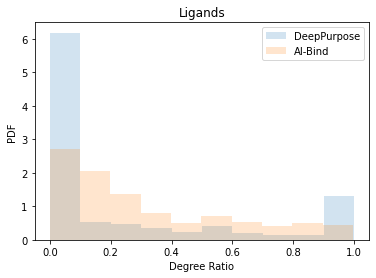

In [101]:
plt.hist(deeppurpose_target_degree_ratios.values(),alpha=0.2,density=True,cumulative=False,label='DeepPurpose') ## Fit a beta distribution

plt.hist(target_degree_ratios.values(),alpha=0.2,density=True,cumulative=False,label='AI-Bind')

plt.legend()
plt.title('Ligands')
plt.xlabel('Degree Ratio')
plt.ylabel('PDF')
plt.show()

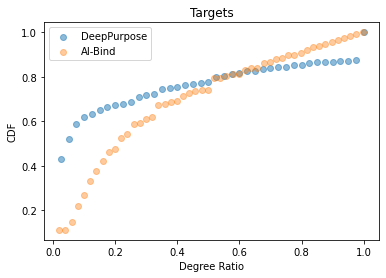

In [95]:
count, bins_count = np.histogram(list(deeppurpose_target_degree_ratios.values()),bins=40)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.scatter(bins_count[1:],cdf, label="DeepPurpose",alpha=0.5)

count, bins_count = np.histogram(list(target_degree_ratios.values()),bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.scatter(bins_count[1:], cdf,label="AI-Bind",alpha=0.4)

plt.legend()
plt.title('Targets')
plt.xlabel('Degree Ratio')
plt.ylabel('CDF')
plt.show()

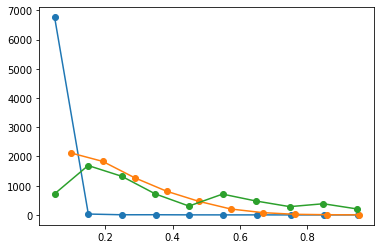

In [41]:
x = list([x/max(list(ligand_pos_deg.values())) for x in list(ligand_pos_deg.values())])
counts,bin_edges = np.histogram(x,10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = [0] * bin_centres.size
plt.errorbar(bin_centres, counts, yerr=err, fmt='-o',label='Positive Degree')

x = list([x/max(list(ligand_neg_deg.values())) for x in list(ligand_neg_deg.values())])
counts,bin_edges = np.histogram(x,10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = [0] * bin_centres.size
plt.errorbar(bin_centres, counts, yerr=err, fmt='-o',label='Negative Degree')

x = list(ligand_degree_ratios.values())
counts,bin_edges = np.histogram(x,10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = [0] * bin_centres.size
plt.errorbar(bin_centres, counts, yerr=err, fmt='-o',label='Degree ratio')
plt.show()

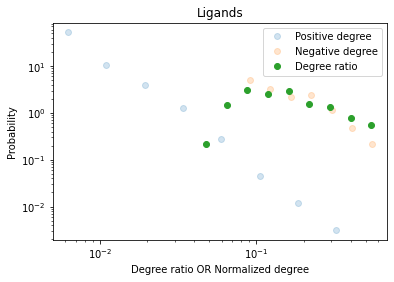

In [37]:
binned_x_i, density_list = log_binning_distribution([x/max(list(ligand_pos_deg.values())) for x in list(ligand_pos_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Positive degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution([x/max(list(ligand_neg_deg.values())) for x in list(ligand_neg_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Negative degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution(list(ligand_degree_ratios.values()),B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Degree ratio')
plt.xlabel('Degree ratio OR Normalized degree')
plt.ylabel('Probability')
plt.title('Ligands')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [17]:
target_pos_deg = dict()
target_neg_deg = dict()
target_degree_ratios = dict()

for tar in tqdm(targets):
    sub_df = network_derived[network_derived['target_aa_code'] == tar]
    target_pos_deg[tar] = sub_df['Y'].to_list().count(1)
    target_neg_deg[tar] = sub_df['Y'].to_list().count(0)
    target_degree_ratios[tar] = sub_df['Y'].to_list().count(1) / (sub_df['Y'].to_list().count(1) + sub_df['Y'].to_list().count(0))

100%|██████████| 4472/4472 [00:27<00:00, 162.28it/s]


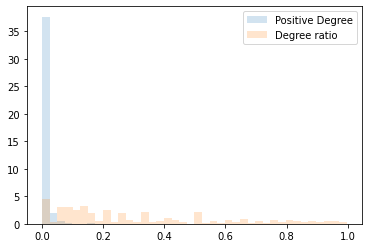

In [21]:
plt.hist([x/max(list(target_pos_deg.values())) for x in list(ligand_pos_deg.values())],alpha=0.2,bins=40,density='True',label='Positive Degree')
#plt.hist([x/max(list(target_neg_deg.values())) for x in list(ligand_neg_deg.values())],alpha=0.2,bins=40,density='True',label='Negative Degree')
plt.hist(target_degree_ratios.values(),alpha=0.2,bins=40,density='True',label='Degree ratio')
plt.legend()
plt.show()

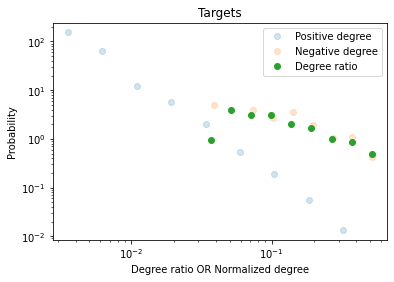

In [36]:
binned_x_i, density_list = log_binning_distribution([x/max(list(target_pos_deg.values())) for x in list(target_pos_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Positive degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution([x/max(list(target_neg_deg.values())) for x in list(target_neg_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Negative degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution(list(target_degree_ratios.values()),B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Degree ratio')
plt.xlabel('Degree ratio OR Normalized degree')
plt.ylabel('Probability')
plt.title('Targets')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Benchmark BindingDB data (DeepPurpose)

In [79]:
#deeppurpose_train = pd.read_csv('../data/DeepPurpose_train.csv')
#deeppurpose_val = pd.read_csv('../data/DeepPurpose_val.csv')
#deeppurpose_test = pd.read_csv('../data/DeepPurpose_test.csv')

deeppurpose_train = pd.read_csv('../data/Transformer_CNN_train_fold2.csv')
deeppurpose_val = pd.read_csv('../data/Transformer_CNN_val_fold2.csv')
deeppurpose_test = pd.read_csv('../data/Transformer_CNN_test_fold2.csv')

In [80]:
deeppurpose_all_data = pd.concat([deeppurpose_train,deeppurpose_val,deeppurpose_test])

In [81]:
ligands = set(deeppurpose_all_data['SMILES'].tolist())
targets = set(deeppurpose_all_data['Target Sequence'].tolist())

print('Distinct ligands: ', len(ligands))
print('Distinct targets: ', len(targets))

Distinct ligands:  13392
Distinct targets:  1507


In [82]:
deeppurpose_ligand_pos_deg = dict()
deeppurpose_ligand_neg_deg = dict()
deeppurpose_ligand_degree_ratios = dict()

for lig in tqdm(ligands):
    sub_df = deeppurpose_all_data[deeppurpose_all_data['SMILES'] == lig]
    deeppurpose_ligand_pos_deg[lig] = sub_df['Label'].to_list().count(1)
    deeppurpose_ligand_neg_deg[lig] = sub_df['Label'].to_list().count(0)
    deeppurpose_ligand_degree_ratios[lig] = sub_df['Label'].to_list().count(1) / (sub_df['Label'].to_list().count(1) + sub_df['Label'].to_list().count(0))

100%|██████████| 13392/13392 [01:52<00:00, 119.09it/s]


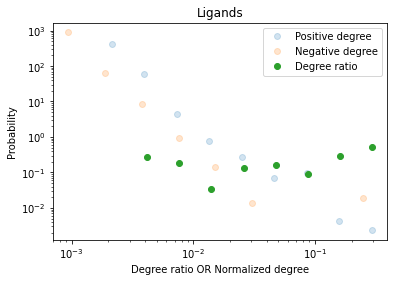

In [86]:
binned_x_i, density_list = log_binning_distribution([x/max(list(deeppurpose_ligand_pos_deg.values())) for x in list(deeppurpose_ligand_pos_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Positive degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution([x/max(list(deeppurpose_ligand_neg_deg.values())) for x in list(deeppurpose_ligand_neg_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Negative degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution(list(deeppurpose_ligand_degree_ratios.values()),B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Degree ratio')
plt.xlabel('Degree ratio OR Normalized degree')
plt.ylabel('Probability')
plt.title('Ligands')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [84]:
deeppurpose_target_pos_deg = dict()
deeppurpose_target_neg_deg = dict()
deeppurpose_target_degree_ratios = dict()

for tar in tqdm(targets):
    sub_df = deeppurpose_all_data[deeppurpose_all_data['Target Sequence'] == tar]
    deeppurpose_target_pos_deg[tar] = sub_df['Label'].to_list().count(1)
    deeppurpose_target_neg_deg[tar] = sub_df['Label'].to_list().count(0)
    deeppurpose_target_degree_ratios[tar] = sub_df['Label'].to_list().count(1) / (sub_df['Label'].to_list().count(1) + sub_df['Label'].to_list().count(0))

100%|██████████| 1507/1507 [00:12<00:00, 117.97it/s]


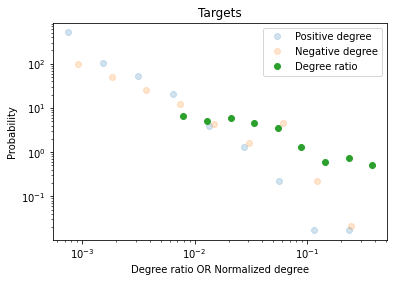

In [87]:
binned_x_i, density_list = log_binning_distribution([x/max(list(deeppurpose_target_pos_deg.values())) for x in list(deeppurpose_target_pos_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Positive degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution([x/max(list(deeppurpose_target_neg_deg.values())) for x in list(deeppurpose_target_neg_deg.values())],B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Negative degree',alpha =0.2)
binned_x_i, density_list = log_binning_distribution(list(deeppurpose_target_degree_ratios.values()),B = 10)
plt.loglog(binned_x_i,density_list,'o',label='Degree ratio')
plt.xlabel('Degree ratio OR Normalized degree')
plt.ylabel('Probability')
plt.title('Targets')
plt.xscale('log')
plt.yscale('log')
plt.legend()